# Assignment#2

```bash
수업 : ComputerVision
교수님 : 김낙현 교수님

학과 : 컴퓨터전자시스템 공학부
학번 : 201600765
이름 : 김주원
제출날짜 : 22.04.15
```

## 1. Sobel 에지 검출
- 본인이 촬영한 영상(크기를 800x800 이하로 조절)에 Sobel 에지 검출을 수행하고 소스 코드와 결과 영상을 제시. 수평과 수직방향 에지 검출 결과와 gradient magnitude로 결합한 결과 영상을 제시
- 촬영한 영상을 800*800보다 작게 만드는 코드를 추가하였습니다.

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# OpenCV를 이용해서 사진 load
img = cv.imread('computer_vision_assignment.png')

# 이미지 크기 체크
print("이미지 크기: ", img.shape)

이미지 크기:  (3024, 4032, 3)


현재 shape: (504, 504, 3)


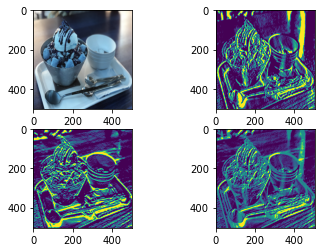

In [2]:
# 이미지 1/6 resize (800*800보다 작게 만들어주기 위해)
r,c = img.shape[:2]
# 행, 열을 1/6 크기로 줄여주고, 나누어 떨어지지 않을 경우 분수꼴이 되지 않도록 조절
new_r = int((1/6)*r)
new_c = int((1/6)*r)
img = cv.resize(img, (new_r,new_c))
print("현재 shape:", img.shape)

gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# 수평, 수직 방향 sobel edge진행 
x_edges = cv.Sobel(gray, -1, 1, 0, ksize=5)
y_edges = cv.Sobel(gray, -1, 0, 1, ksize=5)

# gradient magnitude 적용
new_x_edges = cv.convertScaleAbs(x_edges)
new_y_edges = cv.convertScaleAbs(y_edges)
gradient_magnitude = cv.addWeighted(new_x_edges, 0.5, new_y_edges, 0.5, 0)

# 원본 
plt.subplot(2,2,1)
plt.imshow(img)
# x축 sobel edge detection
plt.subplot(2,2,2)
plt.imshow(x_edges)
# y축 sobel edge detection
plt.subplot(2,2,3)
plt.imshow(y_edges)
# gradient_magnitude
plt.subplot(2,2,4)
plt.imshow(gradient_magnitude)

## 2. Canny 에지 검출
1번 영상에 대해 s = 1, 3, 5, 7로 변화시킨 Canny 에지 검출을 수행하고 소스 코드와 결과 영상을 제시. Threshold를 적절히 조절. s 를 조절하는 경우 Canny 함수를 호출하기 전에 Gaussian convolution을 먼저 해야 함.

- 1번에서 gray가 된 영상을 가지고 진행해주었습니다. (672*672인 영상)

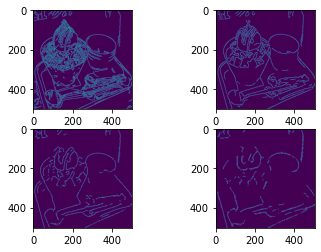

In [11]:
# sigma 1,3,5,7
sigma = [1,3,5,7]

# sigma 1,3,5,7에 따른 weight
# 해당되는 weight으로 Gaussian filtering된 사진을 저장 
weight = []
for s in sigma : 
    weight.append(6*s+1)
    
blur = []
for i in range(len(weight)) : 
    blur.append(cv.GaussianBlur(gray, (weight[i], weight[i]), sigma[i]))

# Gaussian Convolution이 된 상황에서 Canny함수 호출 
canny = []
for i in range(len(blur)):
    canny.append(cv.Canny(blur[i],25,50,3))
                            
# sigma = 1,3,5,7로 된 canny 
for i in range(1,len(canny)+1):
    plt.subplot(2,2,i)
    plt.imshow(canny[i-1])

### 3. Canny edge에서 방향 검출
- a. 256x256 크기 영상에서 중심이 (128, 128) 이고 반경이 80 픽셀인 원을 생성. 배경의 색상은 50, 원의 색상은 200으로 지정.
- b. s = 1 인 Canny 방식으로 에지를 검출
- c. 각 에지점의 방향을 검출하는 기능을 추가하여 각도가 30도 ~60도 인 픽셀들만 검출하여 디스플레이 함


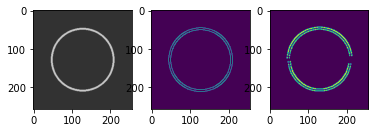

In [43]:
# a. 256x256 크기 영상에서 중심이 (128, 128) 이고 반경이 80 픽셀인 원을 생성. 
# 배경의 색상은 50, 원의 색상은 200으로 지정.
g = np.ones((256,256),np.uint8) * 50 # 색상 50으로 지정
g = cv.circle(g, (128,128), 80, 200, 3) # 색상 200으로 지정

g = cv.cvtColor(g, cv.COLOR_BGR2RGB)

# b. s = 1 인 Canny 방식으로 에지를 검출
s = 1
w = 6*s + 1
blur = cv.GaussianBlur(g, (w,w), s)
canny = cv.Canny(blur,50,100,3)

# c. 각 에지점의 방향을 검출하는 기능을 추가하여 각도가 30도 ~60도 인 픽셀들만 검출하여 디스플레이 함
# 수평, 수직 방향 sobel edge진행 
x_edges = cv.Sobel(canny, -1, 1, 0, ksize=5)
y_edges = cv.Sobel(canny, -1, 0, 1, ksize=5)

new_x_edges = cv.convertScaleAbs(x_edges)
new_y_edges = cv.convertScaleAbs(y_edges)

weight = cv.addWeighted(new_y_edges, 0.5, new_y_edges, 0.5, 0)

# 원본 사진 영상
plt.subplot(1,3,1)
plt.imshow(g)
# s=1 Canny edge detection
plt.subplot(1,3,2)
plt.imshow(canny)
# 원본 사진 영상
plt.subplot(1,3,3)
plt.imshow(weight)

## 4. 실습 
실습 1~4의 코드와 결과를 제출함

### 4.1 실습 1
- ‘pattern.png’ 영상에 대해 erosion, opening, dilation, closing 등을 수행하여 다음 장의 그림과 유사한 결과를 얻음
- 반경이 8인 disk(15,15)를 structuring element로 사용
- 비교결과 : 패턴을 각각 erosion, opening, dilation, closing을 진행하였고, 같은 결과가 나오는걸 볼 수 있었습니다.

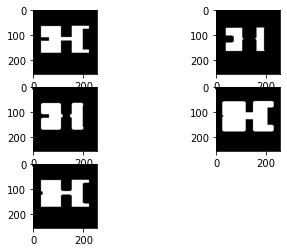

In [5]:
pattern = cv.imread('pattern.png')
kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(15,15))

# erosion, opening, dilation, closing 진행
erosion = cv.erode(pattern, kernel, iterations = 1)
opening = cv.morphologyEx(pattern, cv.MORPH_OPEN, kernel)
dilation = cv.dilate(pattern, kernel, iterations = 1)
closing = cv.morphologyEx(pattern, cv.MORPH_CLOSE, kernel)

# 출력
plt.subplot(3,2,1)
plt.imshow(pattern) # 원본
plt.subplot(3,2,2)
plt.imshow(erosion) # erosion
plt.subplot(3,2,3)
plt.imshow(opening) # opening
plt.subplot(3,2,4)
plt.imshow(dilation) # dilation
plt.subplot(3,2,5)
plt.imshow(closing) # closing
plt.show()


### 4.2 실습 2
- 다음 쪽 그림에 있는 영상 처리 과정을 시현함
- 영상 ‘0907.png’를 사용
- Structuring element의 모양을 ‘cv.MORPH_CROSS’ (3x3)로 해야 함
- Dilation을 수행하여 그림 (b)를 얻음
- 그림 (a), (b)를 display 하여 그림과 비교 결과 : a, b를 matplotlib를 이용해 display를 해주었고, 예시와 같은 결과가 나오는 것을 확인할 수 있었습니다.


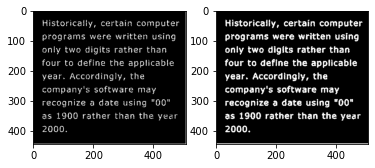

In [6]:
png0907 = cv.imread('0907.png')
kernel = cv.getStructuringElement(cv.MORPH_CROSS,(3,3))

# erosion, opening, dilation, closing 진행
dilation_png0907 = cv.dilate(png0907, kernel, iterations = 1)

# 출력
plt.subplot(1,2,1)
plt.imshow(png0907) # a
plt.subplot(1,2,2)
plt.imshow(dilation_png0907) # b
plt.show()

### 4.3 실습 3
- 다음 쪽 그림이 있는 지문 영상 처리 과정을 시현함
- ‘0911.png’ 파일을 입력으로 사용
- Structuring element를 3x3 square로 설정 (cv.MORPH_RECT)
- Erosion-Dilation-Dilation-Erosion (또는 opening-closing)을 반복하여 그림 e를 얻음
- 그림 a, c, e를 display 한결과 똑같이 나오는걸 확인할 수 있었습니다.


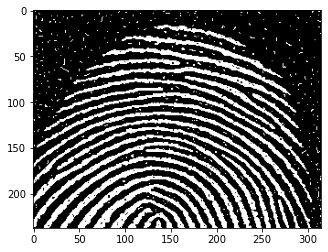

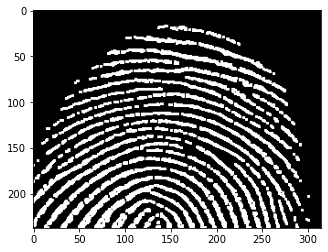

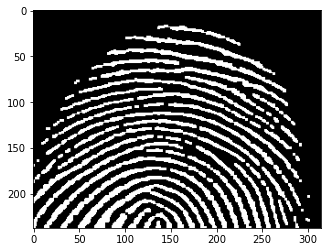

In [7]:
a = cv.imread('0911.png')
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))

# opening
c = cv.morphologyEx(a, cv.MORPH_OPEN, kernel)
# closing
e = cv.morphologyEx(c, cv.MORPH_CLOSE, kernel)

# 출력
plt.imshow(a) # a
plt.show()
plt.imshow(c) # c
plt.show()
plt.imshow(e) # e
plt.show()

### 4.4 실습 4
- 다음 그림과 같은 결과를 얻을 수 있도록 경계 추출 프로그램을 작성함
- ‘0914.png’를 입력 영상으로 사용
- 3x3 rectangle을 structuring element로 하여 erosion을 수행.
- Original 영상에서 erosion 결과를 빼서 결과를 얻음

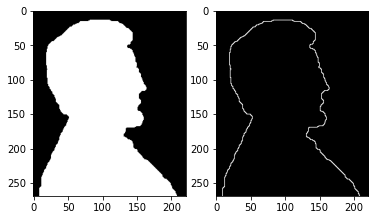

In [8]:
Original = cv.imread('0914.png')
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))

# opening
erosion = cv.erode(Original, kernel, iterations = 1)
# Original - erosion
result = cv.subtract(Original, erosion) 

# 출력
plt.subplot(1,2,1)
plt.imshow(Original) # original
plt.subplot(1,2,2)
plt.imshow(result) # original - erosion
plt.show()